In [1116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [1117]:
STATES = ['CA', 'NM', 'NJ', 'NV']
KDE_BANDWIDTH = 0.4
NORMALIZATION_FACTOR = 10000
START_YEAR = 2022
START_MONTH = 5
START_DAY = 31
END_YEAR = 2022
END_MONTH = 12
END_DAY = 31
LOWER_INTERVAL_BOUND = dt.datetime(START_YEAR, START_MONTH, START_DAY)  # Datetime object from which the analysis on the data starts
UPPER_INTERVAL_BOUND = dt.datetime(END_YEAR, END_MONTH, END_DAY)        # Datetime object from which the analysis on the data ends

In [1118]:
def normalize(df, pop, nf=NORMALIZATION_FACTOR):
    """
    Returns a normalized version of the dataframe

    Args:
        df (Dataframe):
        pop (int): Population of the selected jurisdiction
        nf (int, optional): Normalization Factor. Defaults to NORMALIZATION_FACTOR.

    Returns:
        Dataframe:
    """
    return (df/pop) * nf
def stringify_distribution_moments(series, title='', print_on=True):
    series_expected = series.mean().round()
    series_variance = series.var().round(3)
    series_skewness = series.skew().round(3)
    series_kurtosis = series.kurtosis().round(3)
    s = "---- {} ----\nCenter: {}\nVariance: {}\nSkewness: {}\nKurtosis: {}".format(title,series_expected, series_variance, series_skewness, series_kurtosis)
    if print_on: 
        print(s)
    return s

def get_state_data(state_name):
    return get_state_cases_deaths_df(state_name), get_state_population(state_name)
def get_state_population(state_name):
    return pd.read_csv('data/{}_new_cases_deaths.csv'.format(state_name))['Population'].values[0]
def get_state_cases_deaths_df(state_name):
    return wrangle(pd.read_csv('data/{}_new_cases_deaths.csv'.format(state_name)))
def wrangle(df):
    new_df = df.copy()
    new_df.drop(['Population'], axis=1, inplace=True)
    new_df.columns = ['Date', 'Cases', 'Deaths']
    new_df.set_index(new_df.columns[0], inplace=True)
    new_df.set_index(pd.to_datetime(new_df.index), inplace=True)
    return new_df
def get_weekly_statistic(df, statistic='sum'):
    if statistic == 'mean':
        return df.groupby(df.index.isocalendar().week, axis=0).mean().round()
    elif statistic == 'median':
        return df.groupby(df.index.isocalendar().week, axis=0).median().round()
    elif statistic == 'sum':
        return df.groupby(df.index.isocalendar().week, axis=0).sum().round()

In [1119]:
state_1_df, state_1_pop = get_state_data(STATES[0])
state_2_df, state_2_pop = get_state_data(STATES[1])
state_3_df, state_3_pop = get_state_data(STATES[2])
state_4_df, state_4_pop = get_state_data(STATES[3])
state_1_df = normalize(state_1_df, state_1_pop)
state_2_df = normalize(state_2_df, state_2_pop)
state_3_df = normalize(state_3_df, state_3_pop)
state_4_df = normalize(state_4_df, state_4_pop)

In [1120]:
state_1_weekly_df = get_weekly_statistic(state_1_df)
state_2_weekly_df = get_weekly_statistic(state_2_df)
state_3_weekly_df = get_weekly_statistic(state_3_df)
state_4_weekly_df = get_weekly_statistic(state_4_df)

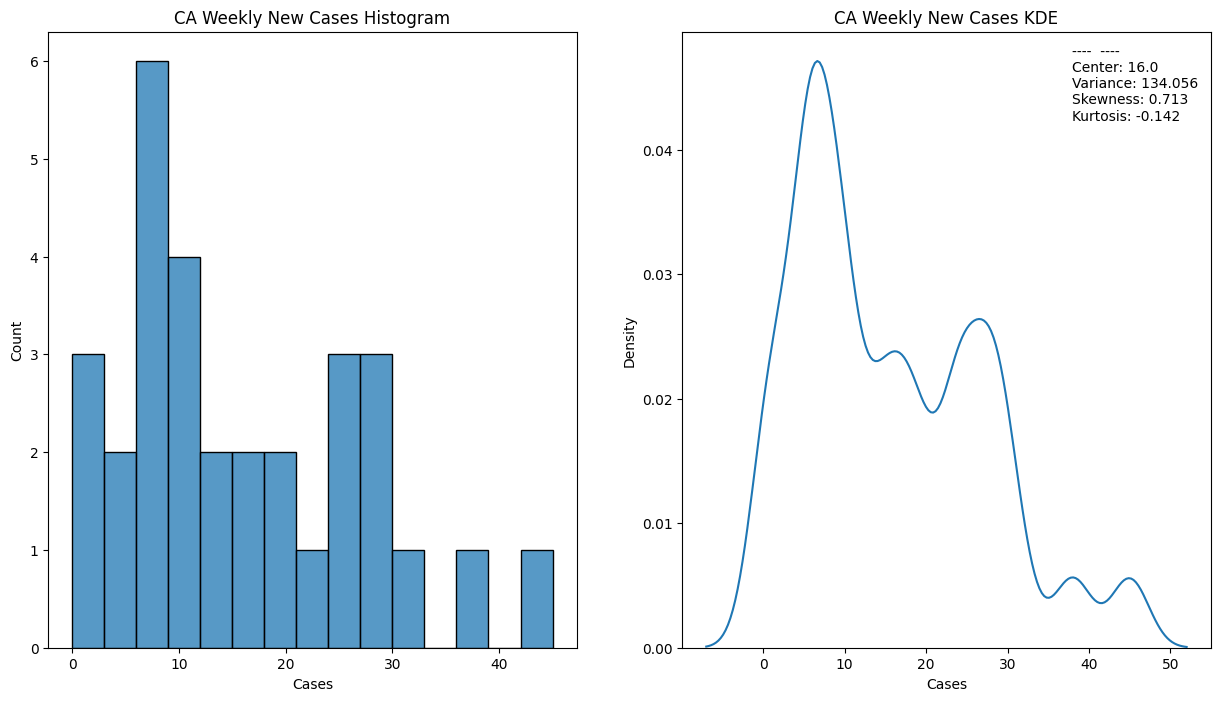

In [1121]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots()
state_1_weekly_cases_hist = sns.histplot(data=state_1_weekly_df.Cases, bins=15, ax=ax[0])
state_1_weekly_cases_kde = sns.kdeplot(data=state_1_weekly_df.Cases, bw_adjust=KDE_BANDWIDTH, ax=ax[1])
ax[0].set_title('{} Weekly New Cases Histogram'.format(STATES[0]))
ax[1].set_title('{} Weekly New Cases KDE'.format(STATES[0]))
anc = AnchoredText(stringify_distribution_moments(state_1_weekly_df.Cases, print_on=False), loc="upper right", frameon=False)
ax[1].add_artist(anc)

In [1122]:
dm = stringify_distribution_moments(state_1_weekly_df.Cases, title='CA Cases')

---- CA Cases ----
Center: 16.0
Variance: 134.056
Skewness: 0.713
Kurtosis: -0.142


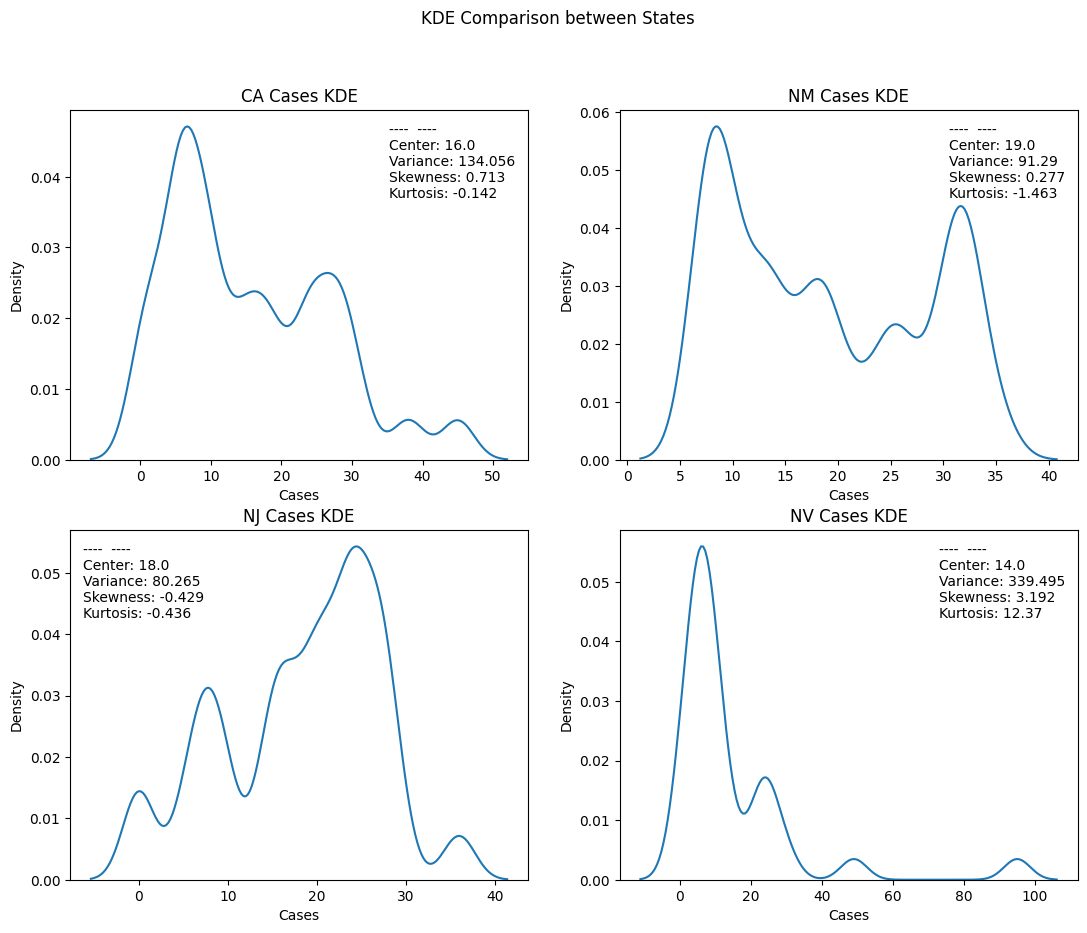

In [1123]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))

fig.suptitle('KDE Comparison between States')
state_1_weekly_cases_kde = sns.kdeplot(data=state_1_weekly_df.Cases, bw_adjust=KDE_BANDWIDTH, ax=ax[0,0], label='{} Cases'.format(STATES[0]))
state_2_weekly_cases_kde = sns.kdeplot(data=state_2_weekly_df.Cases, bw_adjust=KDE_BANDWIDTH, ax=ax[0,1], label='{} Cases'.format(STATES[1]))
state_3_weekly_cases_kde = sns.kdeplot(data=state_3_weekly_df.Cases, bw_adjust=KDE_BANDWIDTH, ax=ax[1,0], label='{} Cases'.format(STATES[2]))
state_4_weekly_cases_kde = sns.kdeplot(data=state_4_weekly_df.Cases, bw_adjust=KDE_BANDWIDTH, ax=ax[1,1], label='{} Cases'.format(STATES[3]))
ax[0,0].set_title('{} Cases KDE'.format(STATES[0]))
ax[0,1].set_title('{} Cases KDE'.format(STATES[1]))
ax[1,0].set_title('{} Cases KDE'.format(STATES[2]))
ax[1,1].set_title('{} Cases KDE'.format(STATES[3]))
anc = AnchoredText(stringify_distribution_moments(state_1_weekly_df.Cases, print_on=False), loc="upper right", frameon=False)
ax[0,0].add_artist(anc)
anc = AnchoredText(stringify_distribution_moments(state_2_weekly_df.Cases, print_on=False), loc="upper right", frameon=False)
ax[0,1].add_artist(anc)
anc = AnchoredText(stringify_distribution_moments(state_3_weekly_df.Cases, print_on=False), loc="upper left", frameon=False)
ax[1,0].add_artist(anc)
anc = AnchoredText(stringify_distribution_moments(state_4_weekly_df.Cases, print_on=False), loc="upper right", frameon=False)
ax[1,1].add_artist(anc)

### Comment about the difference between distributions

Comparing the four distributions along side each other, we can see that there are consistency about some new cases rate, for california for example, after normalization, we can see that we have two spikes around 10 & 25 cases per the normalization factor for each week. the patter repeats for New Mexico, we can see that it also have a 2 spike distribution around 10 & 32. Both CA and NM have a positive skewness and a negative kurtosis.
The pattern is alittle bit off for both New Jersey and Nevada, as they only have one main spike with the difference being the variance, as NV has a remarkable variance in values and positive skewness and kurtosis, while NJ has a negative skewness and kurtosis.
Most of the centers of the distributions are close to each other, with Nevada being the lowest with 14 new cases per normalization factor per week, and the rest of the states 16, 19 and 18 for CA, NM, and NJ respectively.

In [1124]:
enrichment_df = pd.read_csv('data/enrichment.csv')
enrichment_df[enrichment_df.columns[3:]] = enrichment_df[enrichment_df.columns[3:]].apply(lambda x: x.str.strip('%').astype('float'))
enrichment_df = enrichment_df[enrichment_df['Sex'] == 'T']
enrichment_df = enrichment_df.drop(['Sex', 'StateFIPS'], axis=1)
enrichment_df = enrichment_df.set_index(enrichment_df['State']).drop('State', axis=1)
enrichment_df = enrichment_df.sort_index()
enrichment_youth_df = enrichment_df[enrichment_df.columns[:8]]
enrichment_senior_df = enrichment_df[enrichment_df.columns[8:]]
enrichment_youth_df = enrichment_youth_df.aggregate(np.sum, axis=1)
enrichment_senior_df = enrichment_senior_df.aggregate(np.sum, axis=1)
enrichment_df.head(3)

,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
State,,,,,,,,,,,,,,,,,,
AK,6.3,7.1,7.2,6.9,6.3,7.5,7.9,7.5,6.6,5.5,5.8,5.9,6.4,5.6,3.6,2.2,1.1,0.9
AL,5.8,5.9,6.7,6.7,6.4,6.2,6.3,6.2,6.5,6.0,6.3,6.6,6.8,5.8,4.9,3.2,2.1,1.6
AR,5.9,6.5,6.8,6.8,6.6,6.1,6.6,6.5,6.2,5.8,6.0,6.5,6.3,5.5,4.9,3.3,2.0,1.7


In [1125]:
covid_df = pd.read_csv('data/covid_confirmed_usafacts.csv')
covid_df = covid_df[covid_df['countyFIPS'] != 0]
covid_df = covid_df.drop(['countyFIPS', 'County Name', 'StateFIPS'], axis=1)
covid_df = covid_df.groupby('State').sum()
covid_df = covid_df.transpose()
covid_df.index = pd.to_datetime(covid_df.index)
covid_df = covid_df.loc[LOWER_INTERVAL_BOUND:UPPER_INTERVAL_BOUND]
covid_df = covid_df.diff(axis=0)
covid_df = covid_df.drop(covid_df.index[0])
covid_df = covid_df.transpose()
covid_df = covid_df.sort_index()
covid_df = covid_df.groupby(covid_df.columns.isocalendar().week, axis=1).sum()
covid_df.head(3)

week,22,23,24,25,26,27,28,29,30,31,...,43,44,45,46,47,48,49,50,51,52
State,,,,,,,,,,,,,,,,,,,,,
AK,0.0,3248.0,1984.0,2316.0,2535.0,1949.0,2286.0,2249.0,2263.0,1765.0,...,597.0,279.0,0.0,366.0,788.0,0.0,462.0,316.0,678.0,0.0
AL,2066.0,8332.0,9620.0,11287.0,12783.0,14633.0,16649.0,17366.0,16712.0,12047.0,...,2982.0,0.0,6042.0,1898.0,2872.0,4186.0,5807.0,6465.0,7377.0,0.0
AR,1762.0,3837.0,4696.0,5442.0,6958.0,8037.0,9272.0,8870.0,7889.0,6858.0,...,1704.0,1922.0,2123.0,1638.0,1687.0,3289.0,3261.0,3601.0,2375.0,4507.0


In [1126]:
states_pop = pd.read_csv('data/covid_county_population_usafacts.csv')
states_pop = states_pop[states_pop['countyFIPS'] != 0].drop(['countyFIPS', 'County Name'], axis=1).groupby('State', axis=0).sum().sort_index()
states_pop.head(3)

,population
State,
AK,731545
AL,4903185
AR,3017804


In [1127]:
covid_mean_df = covid_df.mean(axis=1).round()
covid_mean_normalized_df = covid_mean_df.divide(states_pop['population']) * NORMALIZATION_FACTOR
covid_mean_normalized_df = covid_mean_normalized_df.round()
covid_mean_normalized_df.head(3)

State
AK    15.0
AL    17.0
AR    15.0
dtype: float64

In [1128]:
covid_enrich_df = {'Cases': covid_mean_normalized_df, 'Youth':enrichment_youth_df, 'Senior':enrichment_senior_df}
covid_enrich_df = pd.concat(covid_enrich_df, axis=1).dropna()
covid_enrich_df.head(3)

,Cases,Youth,Senior
State,,,
AK,15.0,56.7,43.6
AL,17.0,50.2,49.8
AR,15.0,51.8,48.2


<Axes: xlabel='Cases', ylabel='Senior'>

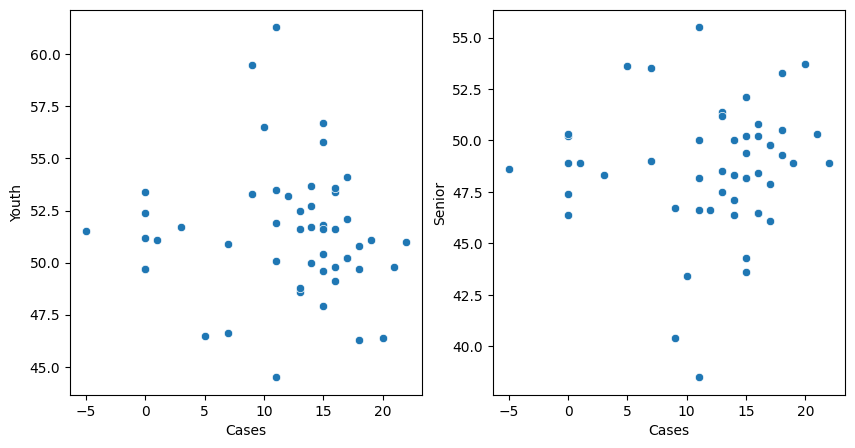

In [1129]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x=covid_enrich_df.Cases, y=covid_enrich_df.Youth, ax=ax[0])
sns.scatterplot(x=covid_enrich_df.Cases, y=covid_enrich_df.Senior, ax=ax[1])

### Correlation Analysis

The anaylis is trying to figure out if a correlation is happening between the percentages of age groups in every state and the number of new covid cases.

#### Assumptions

Youth are considered citizens of ages from 0 to 40 years old, while senior citizens are considered 40< years old.
The enrichment data is in a percentage format, a little bit of wrangling and aggregations with rounding take place, therefore the percentages may be off with an acceptable ~0.3 percent.

#### Procedure

* Covid data for all states has been collected as a dataframe, wrangling and aggregations take place, weekly statistics is used for new cases, and the mean of weeks 22 through 52 of the year 2022 is considered the center value for new cases for each state.

* Enrichment data is cleaned and sorted to align with covid data, irrelevant records were dropped, like counties data, and gender statistics.

* Enrichment data doesn't require normalization, however covid data is normalized by using every state population from the population dataset, after aggregating and sorting, the populations are used in addition to the NORMALIZATION FACTOR to normalized the new covid cases dataframe.

* Enrichment data is then separated into only two age groups, labeled Youth and Senior, these groups are the aggregation result of multiple age groups that were included in the data set.

* A scatter plot is used to plot the data points of new cases against the percentages of the two age groups as seen above.

#### Findings

* A weak negative correlation between the youth population percentage increase and new cases increase, meaning on average, as youth percentage increase in a population, the new cases slightly decrease.

* A weak positive correlation between the senior population percentage increase and new cases increase, meaning on average, as senior percentage increase in a population, the new cases slightly increase.


#### Hypothesis Testing

##### Hypothesis #1:

* Hypothesis:
  * **Null Hypothesis H0** - Youth dominated states have similar new cases rate as the entire country
  * **Alternative Hypothesis H1** - Youth dominated states have different new cases rate from the entire country

In [1130]:
states_mean = covid_enrich_df.Cases.mean().round()
covid_youth_dom = covid_enrich_df[covid_enrich_df['Youth'] > 50].drop(['Youth', 'Senior'], axis=1)

In [1131]:
stats.ttest_1samp(a= covid_youth_dom.Cases, popmean= states_mean)  

TtestResult(statistic=-0.2666632804877797, pvalue=0.7912932917146352, df=35)

* Results shows
  * The test statistic "t" is equal to -0.2667
  * The PValue is 0.791 (>0.05)
  * A high PValue shows that there is no significant difference between the population mean and the youth new cases mean

##### We should reject the Alternative Hypothesis H1

##### Hypothesis #2:

* Hypothesis:
  * **Null Hypothesis H0** - Seniors dominated states have similar new cases rate as the entire country
  * **Alternative Hypothesis H1** - Seniors dominated states have different new cases rate from the entire country

In [1132]:
covid_seniors_dom = covid_enrich_df[covid_enrich_df['Senior'] > 50].drop(['Youth', 'Senior'], axis=1)

In [1133]:
stats.ttest_1samp(a= covid_seniors_dom.Cases, popmean= states_mean)  

TtestResult(statistic=0.3084755732133888, pvalue=0.7622627914598168, df=14)

* Results shows
  * The test statistic "t" is equal to 0.3084
  * The PValue is 0.7622 (>0.05)
  * A high PValue shows that there is no significant difference between the population mean and the senior new cases mean

##### We should reject the Alternative Hypothesis H1

##### Hypothesis #3:

* Hypothesis:
  * **Null Hypothesis H0** - Male youth dominated states have similar new cases rate as the entire country
  * **Alternative Hypothesis H1** - Male youth dominated states have different new cases rate from the entire country

In [1149]:
enrichment_df = pd.read_csv('data/enrichment.csv')
enrichment_df[enrichment_df.columns[3:]] = enrichment_df[enrichment_df.columns[3:]].apply(lambda x: x.str.strip('%').astype('float'))
enrichment_df = enrichment_df.drop(['StateFIPS'], axis=1)
enrichment_df = enrichment_df.set_index(['State', 'Sex'])
enrichment_df = enrichment_df.sort_index()
enrichment_youth_df = enrichment_df[enrichment_df.columns[:8]].dropna(axis=0)
enrichment_senior_df = enrichment_df[enrichment_df.columns[8:]]
enrichment_youth_df = enrichment_youth_df.aggregate(np.sum, axis=1)
enrichment_senior_df = enrichment_senior_df.aggregate(np.sum, axis=1)
enrichment_male_youth_df = enrichment_youth_df.loc[enrichment_youth_df.index.get_level_values('Sex') == 'M'].reset_index()
enrichment_female_youth_df = enrichment_youth_df.loc[enrichment_youth_df.index.get_level_values('Sex') == 'F'].reset_index()
truth = enrichment_male_youth_df[enrichment_male_youth_df[enrichment_male_youth_df.columns[2]] > enrichment_female_youth_df[enrichment_female_youth_df.columns[2]]] 
valid_states = covid_enrich_df.index.intersection(truth['State'])
enrichment_male_youth_df = covid_enrich_df.loc[valid_states]

,Cases,Youth,Senior
State,,,
AK,15.0,56.7,43.6
AL,17.0,50.2,49.8
AR,15.0,51.8,48.2
AZ,15.0,51.6,48.2
CA,16.0,53.4,46.5
CO,16.0,53.6,46.5
CT,13.0,48.6,51.4
DC,9.0,59.5,40.4
DE,15.0,47.9,52.1


In [1150]:
stats.ttest_1samp(a= enrichment_male_youth_df.Cases, popmean= states_mean)  

TtestResult(statistic=-0.04425948747093246, pvalue=0.964873853418412, df=50)

* Results shows
  * The test statistic "t" is equal to -0.0442
  * The PValue is 0.9648 (>0.05)
  * A high PValue shows that there is no significant difference between the population mean and the male dominated youth states new cases mean

##### We should reject the Alternative Hypothesis H1